{'inference_id': 'f64d7a63-aa74-4d4f-8965-47140cf40a25', 'time': 0.05070133600020199, 'image': {'width': 665, 'height': 1182}, 'predictions': [{'x': 244.0, 'y': 405.0, 'width': 40.0, 'height': 94.0, 'confidence': 0.880902111530304, 'class': '0', 'class_id': 0, 'detection_id': 'fcc319e8-4e4a-480a-9f3d-7879f199ca50'}, {'x': 325.0, 'y': 558.5, 'width': 38.0, 'height': 93.0, 'confidence': 0.880803108215332, 'class': '0', 'class_id': 0, 'detection_id': '29d354cd-23a4-41e0-a3c7-730dc2efaa16'}, {'x': 202.0, 'y': 657.0, 'width': 36.0, 'height': 86.0, 'confidence': 0.8738217353820801, 'class': '0', 'class_id': 0, 'detection_id': 'e014a23c-120e-4fe4-8c7f-35a0d806d723'}, {'x': 310.0, 'y': 219.5, 'width': 40.0, 'height': 99.0, 'confidence': 0.8732024431228638, 'class': '0', 'class_id': 0, 'detection_id': 'e9ab95fe-64db-4e48-8ae2-6695bb12f662'}, {'x': 320.5, 'y': 726.5, 'width': 41.0, 'height': 95.0, 'confidence': 0.8695878982543945, 'class': '0', 'class_id': 0, 'detection_id': 'b228e60f-fe67-43f2-

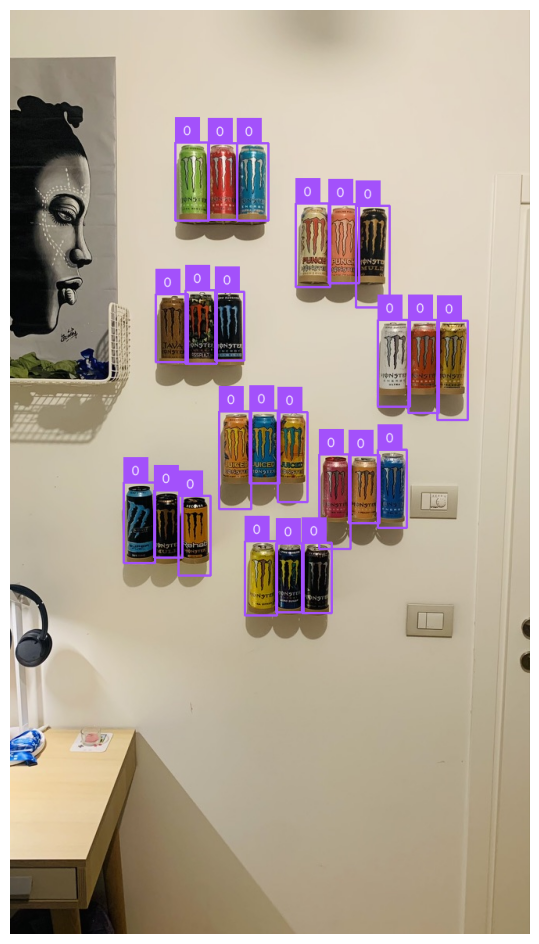

In [1]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="2YoFjYTilm3H760rS15g"
)
mypath = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/monster_wall.jpeg"
result = CLIENT.infer(mypath, model_id="tin-can-r0yev/1")
print(result)

from inference import get_model
import supervision as sv
import cv2

# define the image url to use for inference
image_file = mypath
image = cv2.imread(image_file)

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(result)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

from PIL import Image, ImageDraw
import os

output_folder = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/bounded_images/"
# Make sure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load the original image (use the path to your original image file)
original_image = Image.open(image_file)

# Image dimensions
image_width = result['image']['width']
image_height = result['image']['height']

# Iterate through each prediction and crop the corresponding portion of the image
for i, prediction in enumerate(result['predictions']):
    # Calculate bounding box coordinates
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']

    # Calculate the top-left and bottom-right corners of the bounding box
    left = x - width / 2
    top = y - height / 2
    right = x + width / 2
    bottom = y + height / 2

    # Make sure the coordinates are within the bounds of the original image
    left = max(0, left)
    top = max(0, top)
    right = min(image_width, right)
    bottom = min(image_height, bottom)

    # Crop the image to the bounding box
    cropped_image = original_image.crop((left, top, right, bottom))

    # Save the cropped image in the specified folder
    # Ensure the output path exists
    output_path = os.path.join(output_folder, f"cropped_image_{i}.jpeg")
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    cropped_image.save(output_path)

In [2]:
import cv2
import numpy as np
import os

# Define input and output directories
input_folder = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/bounded_images"
output_folder = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_images"
os.makedirs(output_folder, exist_ok=True)

def enhance_image(image_path, output_path):
    # Load the cropped image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load {image_path}")
        return

    # Step 1: Denoise the image
    denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    # Step 2: Apply sharpening filter
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(denoised, -1, kernel)

    # Step 3: Upscale the image
    upscaled = cv2.resize(sharpened, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Save the processed image
    cv2.imwrite(output_path, upscaled)
    print(f"Saved enhanced image to {output_path}")

# Process each cropped image
for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, f"enhanced_{filename}")
    enhance_image(input_path, output_path)

print("Image enhancement completed.")


Saved enhanced image to /Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_images/enhanced_cropped_image_6.jpeg
Saved enhanced image to /Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_images/enhanced_cropped_image_10.jpeg
Saved enhanced image to /Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_images/enhanced_cropped_image_11.jpeg
Saved enhanced image to /Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_images/enhanced_cropped_image_7.jpeg
Saved enhanced image to /Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solu

In [ ]:
import cv2
import numpy as np

# Carica l'immagine
image_path = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/bounded_images/cropped_image_0.jpeg"  # Sostituisci con il percorso corretto se necessario
image = cv2.imread(image_path)

# Verifica che l'immagine sia stata caricata
if image is None:
    raise FileNotFoundError("Impossibile trovare l'immagine specificata.")

# 1. Converti l'immagine nello spazio colore LAB per migliorare la luminosità
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Separazione dei canali LAB
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Applicazione della CLAHE (Contrast Limited Adaptive Histogram Equalization) sul canale di luminosità
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_channel = clahe.apply(l_channel)

# Ricostruzione dell'immagine LAB
enhanced_lab_image = cv2.merge((l_channel, a_channel, b_channel))

# Conversione di nuovo in BGR
enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

# 2. Riduzione del rumore con il filtro bilaterale
filtered_image = cv2.bilateralFilter(enhanced_image, d=9, sigmaColor=75, sigmaSpace=75)

# 3. Affinamento dei bordi con la nitidezza
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Kernel di nitidezza
sharpened_image = cv2.filter2D(filtered_image, -1, kernel)

# Salva l'immagine migliorata
output_path = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_image.jpeg"
cv2.imwrite(output_path, sharpened_image)
print(f"Immagine migliorata salvata in {output_path}")

Immagine migliorata salvata in /Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/enhanced_image.jpeg


: 

In [3]:
import cv2
import os

image = cv2.imread("/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/bounded_images/cropped_image_0.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)
cv2.imwrite("/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/solution1/canny_image.jpeg",edges)

True